In [1]:
%pip install stable-baselines3==2.0.0 tensorboard

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing necessary libraries
import gymnasium as gym
import mobile_env
import numpy as np
from stable_baselines3 import PPO
from stable_baselines3.ppo import MlpPolicy
from stable_baselines3.common.env_checker import check_env

# predefined small scenarios
from mobile_env.scenarios.smart_city import MComSmartCity

# easy access to the default configuration
MComSmartCity.default_config()

env = gym.make("mobile-smart_city-smart_city_handler-v0", render_mode="rgb_array")

/Users/elifohri/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
# Load the trained model
model_path = "/Users/elifohri/Documents/mobile-env/examples/round_robin/rl_round_robin_rewards_updated/ppo_smart_city_env_model_20250117-115151.zip"
model = PPO.load(model_path)

/Users/elifohri/Library/Python/3.9/lib/python/site-packages/stable_baselines3/common/save_util.py:437: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  th_object = th.load(file

In [4]:
from stable_baselines3.common.evaluation import evaluate_policy

mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10, render=False)
print(f"Mean reward: {mean_reward}, Std reward: {std_reward}")


/Users/elifohri/Library/Python/3.9/lib/python/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Mean reward: 1216.137510997057, Std reward: 404.7403255043014


action: [0. 1.]


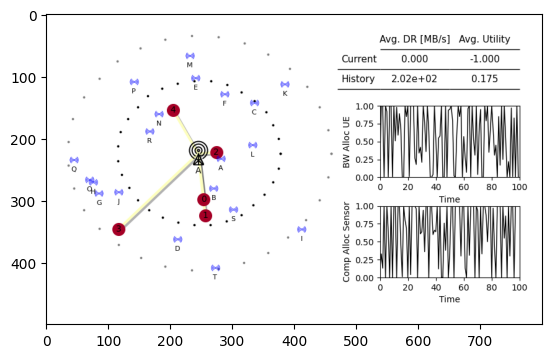

In [5]:
from IPython import display
import matplotlib.pyplot as plt

total_reward = 0

done = False
obs, info = env.reset()

for _ in range(100):
    # Predict the action using the trained model
    action, _states = model.predict(obs)
    print(f"action: {action}")

    # Take the action in the environment
    obs, reward, terminated, truncated, info = env.step(action)

    total_reward += reward

    # Render the environment
    env.render()

    # render the environment
    plt.imshow(env.render())
    display.display(plt.gcf())
    display.clear_output(wait=True) 

    # If the episode ends, reset the environment
    if done:
        obs = env.reset()
        print(f"Episode ended. Total reward so far: {total_reward}")
        total_reward = 0  # Reset total reward for the new episode


plt.close()

In [6]:
scalar_results, kpi_results, ue_results, bs_results, ss_results = env.monitor.load_results()

scalar_results

,number UE connections,number sensor conncections,total traffic request ue,total traffic request sensor,delayed UE packets,delayed sensor packets,mean utility,mean utility sensor,mean datarate,mean datarate sensor
Time Step,,,,,,,,,,
0,5,20,5517.465430,75315.714094,0,0,0.105983,0.140425,2.559612e+00,1.015021e+01
1,5,20,5523.204284,75421.714094,0,0,0.471383,-1.000000,1.374582e+01,1.000000e-10
2,5,20,5530.698006,75531.714094,0,0,0.476482,-1.000000,1.372922e+01,1.000000e-10
3,5,20,5565.698006,75547.621556,0,0,-1.000000,0.186174,1.000000e-10,1.267038e+01
4,5,20,5549.356558,75636.621556,0,1,0.497014,-1.000000,1.487557e+01,1.000000e-10
...,...,...,...,...,...,...,...,...,...,...
95,5,20,5788.191222,81896.686189,0,0,-0.065792,0.183654,4.494260e+01,1.251653e+01
96,5,20,5772.840893,81991.390654,0,17,0.662960,-0.193494,2.115880e+03,2.141010e+00
97,5,20,5787.840893,82026.298116,1,0,-1.000000,0.186174,1.000000e-10,1.267038e+01


In [7]:
kpi_results

,bw allocation UE,bw allocation sensor,comp. allocation UE,comp. allocation sensor,total delayed packets,reward,reward cumulative,total aori,total aosi,total throughput ue,total throughput sensor
Time Step,,,,,,,,,,,
0,0.20,0.80,0.11,0.89,0,0.00,0.00,0.0,0.0,10.346441,45.190023
1,1.00,0.00,0.33,0.67,0,29.50,29.50,2.0,1.0,20.261145,0.000000
2,1.00,0.00,0.13,0.87,0,9.02,38.52,0.0,2.0,41.506279,0.000000
3,0.00,1.00,1.00,0.00,0,18.52,57.05,3.0,3.0,0.000000,85.092538
4,1.00,0.00,0.00,1.00,0,0.00,57.05,0.0,0.0,36.341447,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
95,0.01,0.99,1.00,0.00,0,8.15,1802.69,0.0,4.0,13.497876,63.870165
96,0.83,0.17,0.00,1.00,0,0.00,1802.69,0.0,0.0,45.350329,13.295534
97,0.00,1.00,1.00,0.00,1,32.44,1835.13,21.0,24.0,0.000000,57.092538


In [8]:
bs_results

,Metric,queue size accomplished UE jobs,queue size accomplished sensor jobs,queue size transferred UE jobs,queue size transferred sensor jobs
Time Step,BS ID,,,,
0,0,0,6,0,0
1,0,3,6,0,0
2,0,4,6,2,0
3,0,6,6,0,10
4,0,6,16,4,0
...,...,...,...,...,...
95,0,314,560,0,42
96,0,314,577,5,30
97,0,319,577,0,39
